<a href="https://colab.research.google.com/github/Bisalia/Bayesian_network/blob/main/function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

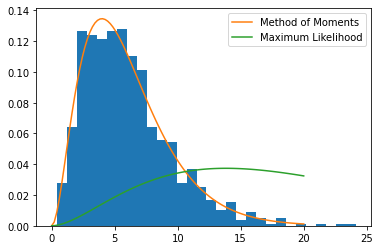

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set parameters of the gamma distribution
alpha = 3
beta = 2

# Generate a sample of size n
n = 1000
sample = np.random.gamma(alpha, beta, n)

# Construct a histogram
plt.hist(sample, bins=30, density=True)

# Estimate parameters using method of moments
mu = np.mean(sample)
sigma = np.std(sample)
alpha_mom = mu**2 / sigma**2
beta_mom = mu / sigma**2

# Estimate parameters using maximum likelihood
from scipy.stats import gamma
alpha_mle, beta_mle, _ = gamma.fit(sample)

# Plot density distributions
x = np.linspace(0, 20, 100)
plt.plot(x, gamma.pdf(x, alpha_mom, scale=1/beta_mom), label='Method of Moments')
plt.plot(x, gamma.pdf(x, alpha_mle, scale=1/beta_mle), label='Maximum Likelihood')
plt.legend()
plt.show()



In [ ]:
# Apply chi-square test
from scipy.stats import chisquare
observed, bins = np.histogram(sample, bins=30, density=True)
expected = gamma.pdf((bins[1:] + bins[:-1])/2, alpha_mle, scale=1/beta_mle)
expected *= sum(observed) / sum(expected)  # scale expected values to match observed values
chisq, pval = chisquare(observed, expected)
print(f"Chi-square statistic: {chisq}, p-value: {pval}")
plt.show()



Chi-square statistic: 5.083705059295364, p-value: 0.9999997897407122
